## Polynomial Linear Regression
<p>A dataset is the collected salaries of employees that correspond to their positions.</p>
<p>The objective is to predict the salary of new hired employee</p>

In [2]:
# imoporting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing dataset
dataset = pd.read_csv('data/salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# extracting training examples from dataset
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

Text(0.5, 1.0, 'Standard Salary of Employee')

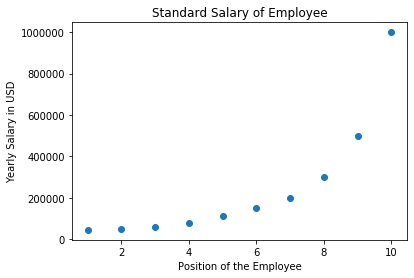

In [5]:
# visualizing the training set
plt.scatter(X, y)
plt.xlabel('Position of the Employee')
plt.ylabel('Yearly Salary in USD')
plt.title('Standard Salary of Employee')

In [6]:
# From the above graph, a line cannot fit with the given points. Hence, we need to add feature with p-th degree
# add second feature with p = 2

def polyFeatures(X, p):
    m = len(X)
    X_poly = np.zeros((m, p))
    for i in range(p):
        X_poly[:, i] = X[:, 0]**(i+1)
    return X_poly
    
# assign p-th = 2
p = 2
X_poly = polyFeatures(X, p)
print(X_poly)

[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]


In [8]:
# normalize the training data
def featureNormalize(X):
    num_features = X.shape[1]
    num_examples = X.shape[0]
    X_norm = np.zeros((num_examples, num_features))
    mu = np.zeros((1, num_features))
    sigma = np.zeros((1, num_features))
    
    # calculate per feature
    for j in range(num_features):
        mu[0,j] = np.mean(X[:, j])
        sigma[0,j] = np.std(X[:, j])
        
        for i in range(num_examples):
            X_norm[i, j] = (X[i, j] - mu[0,j]) / sigma[0, j]
                     
    return X_norm, mu, sigma

[X_norm, mu, sigma] = featureNormalize(X_poly)
# np.set_printoptions(suppress=True, precision=3)
X_norm

array([[-1.5666989 , -1.15669692],
       [-1.21854359, -1.06416117],
       [-0.87038828, -0.90993491],
       [-0.52223297, -0.69401815],
       [-0.17407766, -0.41641089],
       [ 0.17407766, -0.07711313],
       [ 0.52223297,  0.32387514],
       [ 0.87038828,  0.78655391],
       [ 1.21854359,  1.31092318],
       [ 1.5666989 ,  1.89698295]])

In [15]:
# get the number of training examples
m = X.shape[0]

# cost function
def computeCost(X, y, theta, reg_lambda):
    yhat = np.dot(X, theta)
    J = (1/(2*m))*sum((yhat - y)**2) + (reg_lambda/(2*m))*np.sum((theta[1:]**2))                  
    return J

In [16]:
# implementing gradient descent with regularization
def gradientDescent(X, y, theta, alpha, num_iters, reg_lambda=0):
    J_history = np.zeros((num_iters, 1))    
    for i in range(num_iters):
        yhat = X.dot(theta)
        gradients = alpha * (1/m)*(X.T).dot((yhat - y))
        gradients[1:] = gradients[1:] + alpha * (reg_lambda/m)*theta[1:]
        theta = theta - gradients
        J_history[i] = computeCost(X, y, theta, reg_lambda)   
    # return theta and J_history
    return theta, J_history

In [17]:
# setting values for gradient descent implementation
# add 1's to X
X_train = np.concatenate((np.ones((m,1)), X_norm), axis=1)

# initializing theta for 2-predictors and bias term: theta_0, theta_1 and theta_2
theta_prelim = np.zeros((X_train.shape[1], 1))

# initializing theta for 2-predictors and bias term: theta_0, theta_1 and theta_2
theta_prelim = np.zeros((X_train.shape[1], 1))

# learning rate and no. of iterations
alpha = 0.01
num_iters = 20000
reg_lambda = 0

# calculate minimum theta and J's
theta, J_history = gradientDescent(X_train, y, theta_prelim, alpha, num_iters, reg_lambda)

# print minimum theta
print('Minimum theta determined by gradient descent:\n',theta)
print('Minimum cost function, J:', J_history[num_iters-1])


Minimum theta determined by gradient descent:
 [[ 249500.        ]
 [-378525.34862855]
 [ 626859.47509634]]
Minimum cost function, J: [3.37966403e+09]


In [18]:
# Predict the salaries based on the training model
yhat = X_train.dot(theta)
yhat

array([[117448.8240821 ],
       [ 43670.12723192],
       [  8562.70636038],
       [ 12126.56146749],
       [ 54361.69255324],
       [135268.09961763],
       [254845.78266066],
       [413094.74168233],
       [610014.97668265],
       [845606.4876616 ]])

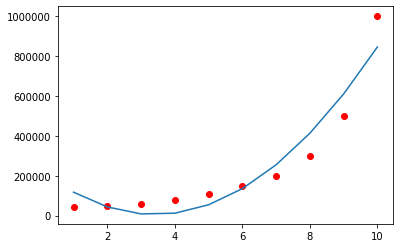

In [19]:
# plotting the curve
plt.scatter(X, y, c='red')
plt.plot(X, yhat)

In [20]:
# model evaluation
RSS = ((y - X_train.dot(theta))**2).sum()  # RSS = Residual Sum of Squares
TSS = ((y - y.mean())**2).sum()            # TSS = Total Sum of Squares
R2 = 1 - RSS/TSS
print('R2 : ', R2)

R2 :  0.9162020888355168


### Using scikit-Learn

In [217]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_p = poly_reg.fit_transform(X)
poly_reg.fit(X_p, y)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_p, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
lin_reg.coef_

array([[      0.   , -132871.212,   19431.818]])

Text(0, 0.5, 'Yearly Salary in USD')

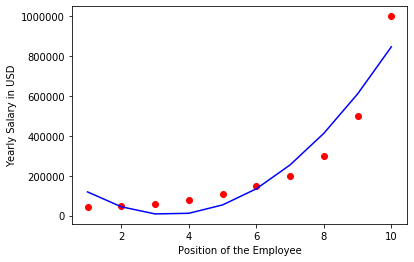

In [220]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('Position of the Employee')
plt.ylabel('Yearly Salary in USD')

In [229]:
# checking regression accuracy
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(poly_reg.fit_transform(X))
R2 = r2_score(y, y_pred)
print('r2 score :', R2)

r2 score : 0.9162082221443942
